In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay)

In [23]:
# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display first few rows
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
# Display basic info
df.info()
print("\n----------------- Dataset Summary -----------------")
print(df.describe())

print("\n Missing Values:", df.isnull().sum())

print("\n Dataset Shape:", df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

----------------- Dataset Summary -----------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531     

In [25]:
# Selecting features and target variable
X = df.iloc[:, :-1]  # Feature columns
y = df.iloc[:, -1]   # Target column

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)  

# Compute the Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119  32]
 [ 27  53]]


In [26]:
# Extract True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN)
TP = np.diag(cm)                     # Diagonal values are True Positives for each class
FP = np.sum(cm, axis=0) - TP           # Column sum minus TP gives False Positives
FN = np.sum(cm, axis=1) - TP           # Row sum minus TP gives False Negatives
TN = np.sum(cm) - (TP + FP + FN)       # Remaining values are True Negatives

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
error_rate = 1 - accuracy

# Display evaluation results
print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nError Rate: {error_rate:.4f}")
print(f"\nPrecision (macro): {precision:.4f}")
print(f"\nRecall (macro): {recall:.4f}")
print(f"\nF1-Score (macro): {f1:.4f}")
print(f"\nTrue Positives: {TP}")
print(f"\nFalse Positives: {FP}")
print(f"\nTrue Negatives: {TN}")
print(f"\nFalse Negatives: {FN} \n")


Accuracy: 0.7446

Error Rate: 0.2554

Precision (macro): 0.7193

Recall (macro): 0.7253

F1-Score (macro): 0.7219

True Positives: [119  53]

False Positives: [27 32]

True Negatives: [ 53 119]

False Negatives: [32 27] 



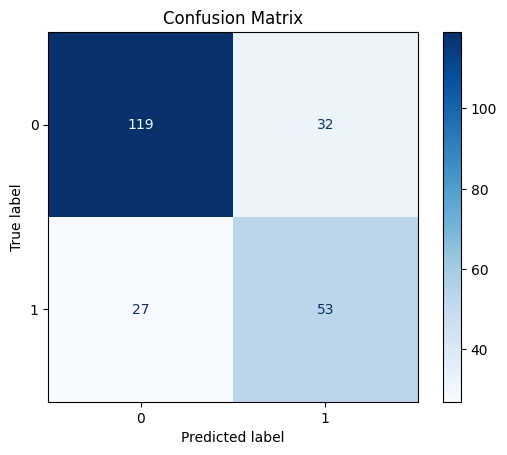

In [27]:
# Plot the Confusion Matrix
display_labels = model.classes_
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [28]:
# Show probability estimates for the first 5 rows in the test set
probabilities = model.predict_proba(X_test[:5])
print("\nProbability Estimates for the First 5 Rows:")
print(probabilities)


Probability Estimates for the First 5 Rows:
[[0.73815858 0.26184142]
 [0.94027894 0.05972106]
 [0.97242831 0.02757169]
 [0.82840069 0.17159931]
 [0.47153473 0.52846527]]
